### EDA on data about amount of people studying for specific fields in YH and amount of people finishing their studies. 

TODO:  
- Create functions so it can be implemented with Taipy. 
- "Clean" data so it is easier to gather insights/plot/etc if necessary.  
#
- Find interesting information & trends.
- Create plots.
- See if KPIs can be extracted. 

NOTES:
- Data is not complete for "examinerade" It goes from 2007/2023. 
 - Data found in another set is different, issue with time, focusing on gathering insights on current data.

 Note: ####### Check if initial data I have is wrong on the new set for amount of exa/study

In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:


df = pd.read_excel("../../data/totalt_studerande_yh_total_only.xlsx", skiprows=2)


df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29 non-null     object 
 1   Unnamed: 1  15 non-null     object 
 2   Unnamed: 2  15 non-null     object 
 3   2005        15 non-null     object 
 4   2006        15 non-null     object 
 5   2007        15 non-null     object 
 6   2008        15 non-null     float64
 7   2009        15 non-null     float64
 8   2010        15 non-null     float64
 9   2011        15 non-null     float64
 10  2012        15 non-null     float64
 11  2013        15 non-null     float64
 12  2014        15 non-null     float64
 13  2015        15 non-null     float64
 14  2016        15 non-null     float64
 15  2017        15 non-null     float64
 16  2018        15 non-null     float64
 17  2019        15 non-null     float64
 18  2020        15 non-null     float64
 19  2021        15 non-null     flo

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2005,2006,2007,2008,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,totalt,Data/It,totalt,2587,2546,2797,2817.0,2857.0,2903.0,3160.0,...,5812.0,6183.0,6210.0,5704.0,7086.0,10283.0,12852.0,14255.0,15162.0,16447.0
1,NaN,"Ekonomi, administration och försäljning",totalt,6238,7582,8807,10264.0,11286.0,11905.0,12179.0,...,11670.0,11529.0,12193.0,13797.0,15994.0,18491.0,18540.0,17818.0,17354.0,17380.0
2,NaN,Friskvård och kroppsvård,totalt,481,738,883,993.0,1009.0,857.0,591.0,...,352.0,303.0,238.0,231.0,302.0,335.0,372.0,408.0,460.0,366.0
3,NaN,"Hotell, restaurang och turism",totalt,2223,2553,2906,3074.0,2965.0,2905.0,2888.0,...,2606.0,2533.0,2534.0,2499.0,2718.0,3094.0,3314.0,3007.0,2753.0,2800.0
4,NaN,Hälso- och sjukvård samt socialt arbete,totalt,2992,3807,4200,4029.0,4091.0,4496.0,4656.0,...,6023.0,6162.0,6727.0,7451.0,9031.0,10904.0,12052.0,12880.0,12521.0,11916.0
5,NaN,Journalistik och information,totalt,114,101,114,159.0,213.0,256.0,299.0,...,649.0,723.0,802.0,833.0,904.0,967.0,936.0,823.0,752.0,646.0
6,NaN,Juridik,totalt,..,61,122,157.0,167.0,173.0,175.0,...,309.0,336.0,412.0,438.0,451.0,484.0,488.0,416.0,346.0,346.0
7,NaN,"Kultur, media och design",totalt,2803,2938,2893,2993.0,2952.0,2791.0,2567.0,...,2769.0,2770.0,2865.0,2904.0,3016.0,3432.0,3916.0,4223.0,4457.0,4636.0
8,NaN,"Lantbruk, djurvård, trädgård, skog och fiske",totalt,920,1341,1538,1502.0,1549.0,1704.0,1654.0,...,1307.0,1407.0,1442.0,1360.0,1416.0,1613.0,1810.0,1950.0,2091.0,2346.0
9,NaN,Pedagogik och undervisning,totalt,16,103,186,220.0,250.0,462.0,660.0,...,422.0,534.0,654.0,861.0,1289.0,1528.0,1806.0,1976.0,1510.0,1095.0


In [15]:
df_cleaned_stud = (
    df.drop(columns=["Unnamed: 0", "Unnamed: 2"])
    .fillna("")
    .rename(columns={"Unnamed: 1": "Utbildningsinriktning"})
    .iloc[:15]
)

df_cleaned_stud

,Utbildningsinriktning,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Data/It,2587,2546,2797,2817.0,2857.0,2903.0,3160.0,3398.0,4054.0,...,5812.0,6183.0,6210.0,5704.0,7086.0,10283.0,12852.0,14255.0,15162.0,16447.0
1,"Ekonomi, administration och försäljning",6238,7582,8807,10264.0,11286.0,11905.0,12179.0,11946.0,12253.0,...,11670.0,11529.0,12193.0,13797.0,15994.0,18491.0,18540.0,17818.0,17354.0,17380.0
2,Friskvård och kroppsvård,481,738,883,993.0,1009.0,857.0,591.0,371.0,363.0,...,352.0,303.0,238.0,231.0,302.0,335.0,372.0,408.0,460.0,366.0
3,"Hotell, restaurang och turism",2223,2553,2906,3074.0,2965.0,2905.0,2888.0,2592.0,2525.0,...,2606.0,2533.0,2534.0,2499.0,2718.0,3094.0,3314.0,3007.0,2753.0,2800.0
4,Hälso- och sjukvård samt socialt arbete,2992,3807,4200,4029.0,4091.0,4496.0,4656.0,4525.0,4965.0,...,6023.0,6162.0,6727.0,7451.0,9031.0,10904.0,12052.0,12880.0,12521.0,11916.0
5,Journalistik och information,114,101,114,159.0,213.0,256.0,299.0,277.0,413.0,...,649.0,723.0,802.0,833.0,904.0,967.0,936.0,823.0,752.0,646.0
6,Juridik,..,61,122,157.0,167.0,173.0,175.0,242.0,280.0,...,309.0,336.0,412.0,438.0,451.0,484.0,488.0,416.0,346.0,346.0
7,"Kultur, media och design",2803,2938,2893,2993.0,2952.0,2791.0,2567.0,2363.0,2509.0,...,2769.0,2770.0,2865.0,2904.0,3016.0,3432.0,3916.0,4223.0,4457.0,4636.0
8,"Lantbruk, djurvård, trädgård, skog och fiske",920,1341,1538,1502.0,1549.0,1704.0,1654.0,1461.0,1355.0,...,1307.0,1407.0,1442.0,1360.0,1416.0,1613.0,1810.0,1950.0,2091.0,2346.0
9,Pedagogik och undervisning,16,103,186,220.0,250.0,462.0,660.0,454.0,424.0,...,422.0,534.0,654.0,861.0,1289.0,1528.0,1806.0,1976.0,1510.0,1095.0


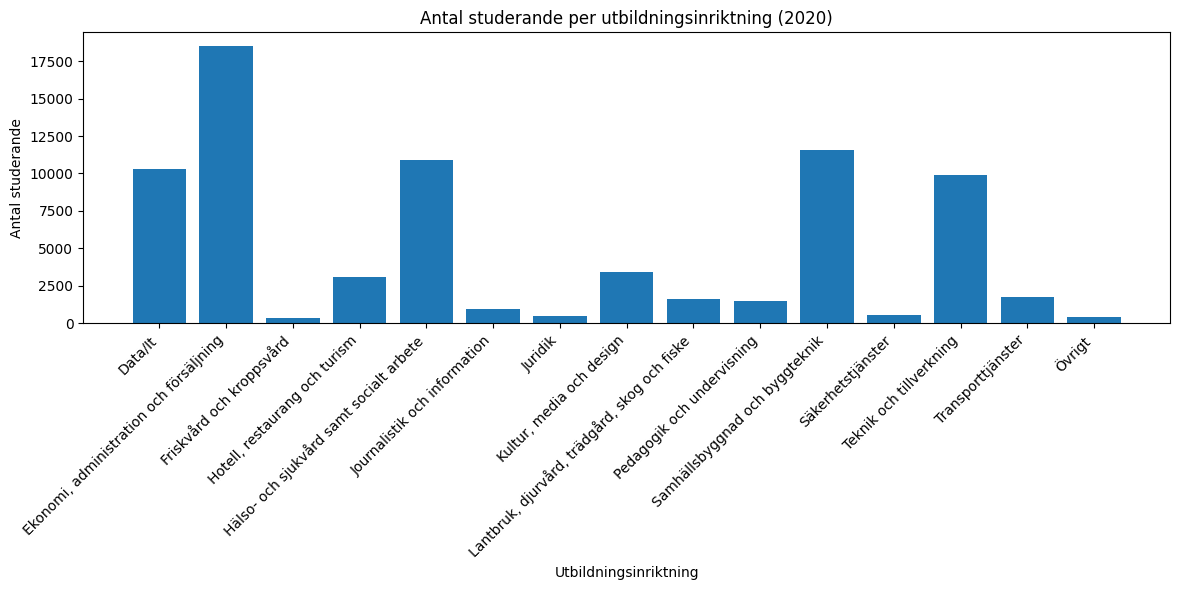

In [ ]:


def bar_plot_year(df, year):
    df[f"{year}]"] = pd.to_numeric(df[f"{year}"], errors="coerce")

    # Set figure size
    plt.figure(figsize=(12, 6))

    x = df["Utbildningsinriktning"]
    y = df[f"{year}"]

    plt.bar(x, y)

    plt.title(f"Antal studerande per utbildningsinriktning ({year})")
    plt.xlabel("Utbildningsinriktning")
    plt.ylabel("Antal studerande")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    plt.show()


bar_plot_year(df_cleaned_stud, 2020)

In [16]:
def plotly_stud_bar(df, year):
    year_str = str(year)
    df_year = df[["Utbildningsinriktning", year_str]].copy()
    df_year.columns = ["Utbildningsinriktning", "Antal"]
    
    fig = px.bar(
        df_year,
        x="Utbildningsinriktning",
        y="Antal",
        title =f"Number of Students per Educational Area ({year})", 
        labels={"Utbildningsinriktning": "Educational Area", "Antal": "Number"},
   
    )
    fig.update_layout(xaxis_tickangle=45)
    return fig


plotly_stud_bar(df_cleaned_stud, 2023)

### Total Studying + Total amount that finished studies in Educational Area

In [36]:
# Encoding latin1 needed to be able to read this csv.
df_studerande = pd.read_csv("../../data/studerande_total_05-24.csv", encoding="latin1").drop(columns=["kön", "ålder"]).fillna("")

# Checked for null. 
print(df_studerande.info())
print(df_studerande.isnull().sum()) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   utbildningens inriktning  16 non-null     object
 1   2005                      16 non-null     object
 2   2006                      16 non-null     object
 3   2007                      16 non-null     object
 4   2008                      16 non-null     int64 
 5   2009                      16 non-null     int64 
 6   2010                      16 non-null     int64 
 7   2011                      16 non-null     int64 
 8   2012                      16 non-null     int64 
 9   2013                      16 non-null     int64 
 10  2014                      16 non-null     int64 
 11  2015                      16 non-null     int64 
 12  2016                      16 non-null     int64 
 13  2017                      16 non-null     int64 
 14  2018                      16

In [46]:
# Encoding latin1 needed to read CSV. 
df_examinerade = pd.read_csv("../../data/examinerade_total_07-23.csv", encoding="latin1")

print(df_examinerade.info())
print(df_examinerade.isnull().sum())  # No nulls

# Removed columns that are not needed + removed the years that do not contain data, 05-07 and 24.
df_examinerade.drop(columns=["kön", "ålder", "2005", "2006", "2024"], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   kön                       16 non-null     object
 1   utbildningens inriktning  16 non-null     object
 2   ålder                     16 non-null     object
 3   2005                      16 non-null     object
 4   2006                      16 non-null     object
 5   2007                      16 non-null     object
 6   2008                      16 non-null     int64 
 7   2009                      16 non-null     int64 
 8   2010                      16 non-null     int64 
 9   2011                      16 non-null     int64 
 10  2012                      16 non-null     int64 
 11  2013                      16 non-null     int64 
 12  2014                      16 non-null     int64 
 13  2015                      16 non-null     int64 
 14  2016                      16

In [45]:
df_examinerade

,utbildningens inriktning,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Totalt,7830,8968,9907,10510,12081,10885,11393,11597,13129,12920,13279,13603,14628,17236,19944,23930,22304
1,Data/It,427,413,515,525,716,594,856,999,1114,1192,1319,1185,1317,1508,2276,3356,3247
2,"Ekonomi, administration och försäljning",2074,2686,2997,3232,3380,3392,3358,3424,3857,3501,3268,3747,4104,4858,5432,5778,4928
3,Friskvård och kroppsvård,202,304,303,305,287,129,99,100,122,106,86,51,99,109,125,129,167
4,"Hotell, restaurang och turism",664,899,832,746,876,794,711,644,676,593,573,674,678,731,893,913,788
5,Hälso- och sjukvård samt socialt arbete,1241,1145,1108,1253,1427,1243,1387,1541,1985,2050,2138,1974,2242,2946,3032,3720,3938
6,Journalistik och information,15,22,43,66,68,61,63,114,164,207,199,191,198,278,303,255,267
7,Juridik,21,42,54,50,26,53,52,79,90,60,102,110,122,122,160,151,105
8,"Kultur, media och design",666,778,782,817,851,676,704,635,837,837,778,935,903,872,1017,1243,1201
9,"Lantbruk, djurvård, trädgård, skog och fiske",460,389,462,369,469,463,417,407,395,409,424,454,324,424,461,571,560


In [47]:
df_studerande

,utbildningens inriktning,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Totalt,24789,29556,33684,36657,39417,41597,42484,40754,42596,...,46633,47983,50373,52741,61393,75371,82753,84871,84560,87225
1,Data/It,2587,2546,2797,2817,2857,2903,3160,3398,4054,...,5812,6183,6210,5704,7086,10283,12852,14255,15162,16447
2,"Ekonomi, administration och försäljning",6238,7582,8807,10264,11286,11905,12179,11946,12253,...,11670,11529,12193,13797,15994,18491,18540,17818,17354,17380
3,Friskvård och kroppsvård,481,738,883,993,1009,857,591,371,363,...,352,303,238,231,302,335,372,408,460,366
4,"Hotell, restaurang och turism",2223,2553,2906,3074,2965,2905,2888,2592,2525,...,2606,2533,2534,2499,2718,3094,3314,3007,2753,2800
5,Hälso- och sjukvård samt socialt arbete,2992,3807,4200,4029,4091,4496,4656,4525,4965,...,6023,6162,6727,7451,9031,10904,12052,12880,12521,11916
6,Journalistik och information,114,101,114,159,213,256,299,277,413,...,649,723,802,833,904,967,936,823,752,646
7,Juridik,..,61,122,157,167,173,175,242,280,...,309,336,412,438,451,484,488,416,346,346
8,"Kultur, media och design",2803,2938,2893,2993,2952,2791,2567,2363,2509,...,2769,2770,2865,2904,3016,3432,3916,4223,4457,4636
9,"Lantbruk, djurvård, trädgård, skog och fiske",920,1341,1538,1502,1549,1704,1654,1461,1355,...,1307,1407,1442,1360,1416,1613,1810,1950,2091,2346


In [56]:
# Reshape both to long format, much easier to plot.
df_stud_long = df_studerande.melt(
    id_vars="utbildningens inriktning", var_name="År", value_name="Studerande"
)
df_exam_long = df_examinerade.melt(
    id_vars="utbildningens inriktning", var_name="År", value_name="Examinerade"
)


df_stud_long["År"] = pd.to_numeric(df_stud_long["År"], errors="coerce")
df_exam_long["År"] = pd.to_numeric(df_exam_long["År"], errors="coerce")


In [ ]:
df_stud_long



,utbildningens inriktning,År,Examinerade
0,Totalt,2007,7830
1,Data/It,2007,427
2,"Ekonomi, administration och försäljning",2007,2074
3,Friskvård och kroppsvård,2007,202
4,"Hotell, restaurang och turism",2007,664
...,...,...,...
267,Samhällsbyggnad och byggteknik,2023,3068
268,Säkerhetstjänster,2023,218
269,Teknik och tillverkning,2023,2561
270,Transporttjänster,2023,489


In [51]:
df_exam_long

,utbildningens inriktning,År,Examinerade
0,Totalt,2007,7830
1,Data/It,2007,427
2,"Ekonomi, administration och försäljning",2007,2074
3,Friskvård och kroppsvård,2007,202
4,"Hotell, restaurang och turism",2007,664
...,...,...,...
267,Samhällsbyggnad och byggteknik,2023,3068
268,Säkerhetstjänster,2023,218
269,Teknik och tillverkning,2023,2561
270,Transporttjänster,2023,489


In [54]:
# Merged into one df for easier plotting
df_merged_stud_exa = pd.merge(
    df_stud_long, df_exam_long, on=["utbildningens inriktning", "År"], how="outer"
)

In [55]:
df_merged_stud_exa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   utbildningens inriktning  320 non-null    object
 1   År                        320 non-null    int64 
 2   Studerande                320 non-null    object
 3   Examinerade               272 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.1+ KB


In [70]:
# Needed to convert the columns to numeric so new column can be created for percentages of examination.
df_merged_stud_exa["Studerande"] = pd.to_numeric(df_merged_stud_exa["Studerande"], errors="coerce")
df_merged_stud_exa["Examinerade"] = pd.to_numeric(df_merged_stud_exa["Examinerade"], errors="coerce")

df_merged_stud_exa.fillna(0, inplace=True)  # Inplace, modifies the original df

df_merged_stud_exa["Andel examinerade"] = (df_merged_stud_exa["Examinerade"] / df_merged_stud_exa["Studerande"] * 100).round(1) # first decimal only. 

In [69]:
df_merged_stud_exa

,utbildningens inriktning,År,Studerande,Examinerade,Andel examinerade
0,Data/It,2005,2587.0,0.0,0.0
1,Data/It,2006,2546.0,0.0,0.0
2,Data/It,2007,2797.0,427.0,15.3
3,Data/It,2008,2817.0,413.0,14.7
4,Data/It,2009,2857.0,515.0,18.0
...,...,...,...,...,...
315,Övrigt,2020,426.0,81.0,19.0
316,Övrigt,2021,477.0,68.0,14.3
317,Övrigt,2022,515.0,117.0,22.7
318,Övrigt,2023,433.0,147.0,33.9


In [71]:
df_merged_stud_exa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   utbildningens inriktning  320 non-null    object 
 1   År                        320 non-null    int64  
 2   Studerande                320 non-null    float64
 3   Examinerade               320 non-null    float64
 4   Andel examinerade         316 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 12.6+ KB


In [77]:
df_merged_stud_exa.to_csv("../../data/merged_tot_exa_stud.csv", index=False) # Add so it does not save index.

In [ ]:
# #! Data not correct from SCB

df_test = pd.read_csv("../../data/merged_tot_exa_stud.csv")

df_test

,utbildningens inriktning,År,Studerande,Examinerade,Andel examinerade
0,Data/It,2005,2587.0,0.0,0.0
1,Data/It,2006,2546.0,0.0,0.0
2,Data/It,2007,2797.0,427.0,15.3
3,Data/It,2008,2817.0,413.0,14.7
4,Data/It,2009,2857.0,515.0,18.0
...,...,...,...,...,...
315,Övrigt,2020,426.0,81.0,19.0
316,Övrigt,2021,477.0,68.0,14.3
317,Övrigt,2022,515.0,117.0,22.7
318,Övrigt,2023,433.0,147.0,33.9


In [92]:
# #! Data not correct

def stud_exa_year_bar(df, year): 
    fig = px.bar(
    df[df["År"] == year],
    x="utbildningens inriktning",
    y="Andel examinerade",
    title=f"Andel examinerade per utbildningsinriktning – {year}",
    labels={"utbildningens inriktning": "Inriktning", "Andel examinerade": "Andel"},

)
    fig.update_layout(xaxis_tickangle=45)
    return fig

stud_exa_year_bar(df_test, 2007)

In [ ]:
def stud_exa_year_bar(df, year): 
    df_filtered = df[df["År"] == year]
    df_filtered = df_filtered[df_filtered["utbildningens inriktning"] != "Totalt"] #

    # Melt for grouped bar chart
    df_melted = df_filtered.melt(
        id_vars=["utbildningens inriktning"],
        value_vars=["Studerande", "Examinerade"],
        var_name="Typ",
        value_name="Antal"
    )

    fig = px.bar(
        df_melted,
        x="utbildningens inriktning",
        y="Antal",
        color="Typ",
        barmode="stack",
        title=f"Studerande och Examinerade per utbildningsinriktning – {year}",
        labels={"utbildningens inriktning": "Inriktning"},
    )

    fig.update_layout(xaxis_tickangle=45)

    return fig

stud_exa_year_bar(df_test, 2023)